In [174]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as stats

In [175]:
country_data = pd.read_csv("CSV_Output/11_country.csv")
country_data.head()

,Unnamed: 0,Song Name,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instramentalness,...,Valence,Tempo,Type,ID,URI,Track Href,Analysis URL,Duration (ms),Time Signature,Country
0,0,Without You,0.669,0.698,11,-4.613,1,0.0910,0.571,0.000000,...,0.286,80.003,audio_features,0KWnRv3wxjltYVB3MqjNd2,spotify:track:0KWnRv3wxjltYVB3MqjNd2,https://api.spotify.com/v1/tracks/0KWnRv3wxjlt...,https://api.spotify.com/v1/audio-analysis/0KWn...,175500,4,Taiwan
1,1,句號,0.720,0.480,10,-8.552,1,0.0604,0.248,0.000000,...,0.464,143.945,audio_features,66YKSygcUZHHqHJZcWslI3,spotify:track:66YKSygcUZHHqHJZcWslI3,https://api.spotify.com/v1/tracks/66YKSygcUZHH...,https://api.spotify.com/v1/audio-analysis/66YK...,235632,4,Taiwan
2,2,Yummy,0.662,0.519,9,-6.554,0,0.1060,0.404,0.000000,...,0.495,145.841,audio_features,41L3O37CECZt3N7ziG2z7l,spotify:track:41L3O37CECZt3N7ziG2z7l,https://api.spotify.com/v1/tracks/41L3O37CECZt...,https://api.spotify.com/v1/audio-analysis/41L3...,210427,4,Taiwan
3,3,Dance Monkey,0.824,0.588,6,-6.400,0,0.0924,0.692,0.000104,...,0.513,98.027,audio_features,2XU0oxnq2qxCpomAAuJY8K,spotify:track:2XU0oxnq2qxCpomAAuJY8K,https://api.spotify.com/v1/tracks/2XU0oxnq2qxC...,https://api.spotify.com/v1/audio-analysis/2XU0...,209438,4,Taiwan
4,4,Why You Gonna Lie,0.768,0.760,7,-3.729,1,0.1050,0.763,0.000000,...,0.736,90.000,audio_features,1rjUBUTswCkN8DIBxkgjJs,spotify:track:1rjUBUTswCkN8DIBxkgjJs,https://api.spotify.com/v1/tracks/1rjUBUTswCkN...,https://api.spotify.com/v1/audio-analysis/1rjU...,174000,4,Taiwan


In [176]:
del country_data['Unnamed: 0']

In [177]:
country_data.head()

,Song Name,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instramentalness,Liveness,Valence,Tempo,Type,ID,URI,Track Href,Analysis URL,Duration (ms),Time Signature,Country
0,Without You,0.669,0.698,11,-4.613,1,0.0910,0.571,0.000000,0.1020,0.286,80.003,audio_features,0KWnRv3wxjltYVB3MqjNd2,spotify:track:0KWnRv3wxjltYVB3MqjNd2,https://api.spotify.com/v1/tracks/0KWnRv3wxjlt...,https://api.spotify.com/v1/audio-analysis/0KWn...,175500,4,Taiwan
1,句號,0.720,0.480,10,-8.552,1,0.0604,0.248,0.000000,0.0704,0.464,143.945,audio_features,66YKSygcUZHHqHJZcWslI3,spotify:track:66YKSygcUZHHqHJZcWslI3,https://api.spotify.com/v1/tracks/66YKSygcUZHH...,https://api.spotify.com/v1/audio-analysis/66YK...,235632,4,Taiwan
2,Yummy,0.662,0.519,9,-6.554,0,0.1060,0.404,0.000000,0.1210,0.495,145.841,audio_features,41L3O37CECZt3N7ziG2z7l,spotify:track:41L3O37CECZt3N7ziG2z7l,https://api.spotify.com/v1/tracks/41L3O37CECZt...,https://api.spotify.com/v1/audio-analysis/41L3...,210427,4,Taiwan
3,Dance Monkey,0.824,0.588,6,-6.400,0,0.0924,0.692,0.000104,0.1490,0.513,98.027,audio_features,2XU0oxnq2qxCpomAAuJY8K,spotify:track:2XU0oxnq2qxCpomAAuJY8K,https://api.spotify.com/v1/tracks/2XU0oxnq2qxC...,https://api.spotify.com/v1/audio-analysis/2XU0...,209438,4,Taiwan
4,Why You Gonna Lie,0.768,0.760,7,-3.729,1,0.1050,0.763,0.000000,0.1410,0.736,90.000,audio_features,1rjUBUTswCkN8DIBxkgjJs,spotify:track:1rjUBUTswCkN8DIBxkgjJs,https://api.spotify.com/v1/tracks/1rjUBUTswCkN...,https://api.spotify.com/v1/audio-analysis/1rjU...,174000,4,Taiwan


In [178]:
#group by country, get stats
danceability_mean_country = pd.DataFrame(country_data.groupby("Country")['Danceability'].mean())
danceability_median_country = pd.DataFrame(country_data.groupby("Country")['Danceability'].median())
danceability_min_country = pd.DataFrame(country_data.groupby("Country")['Danceability'].min())
danceability_max_country = pd.DataFrame(country_data.groupby("Country")['Danceability'].max())

In [179]:
danceability_mean_median = pd.merge(danceability_mean_country,danceability_median_country,on="Country")
danceability_mean_median

,Danceability_x,Danceability_y
Country,,
Australia,0.69492,0.6980
Brazil,0.69378,0.7085
France,0.72736,0.7510
HongKong,0.62102,0.6280
India,0.65892,0.6950
Japan,0.52478,0.5390
Malaysia,0.67102,0.6730
South Africa,0.69990,0.6995
Taiwan,0.63032,0.6440


In [180]:
danceability_max_min = pd.merge(danceability_max_country,danceability_min_country,on="Country")
danceability_max_min

,Danceability_x,Danceability_y
Country,,
Australia,0.896,0.453
Brazil,0.888,0.390
France,0.932,0.410
HongKong,0.896,0.323
India,0.862,0.285
Japan,0.769,0.228
Malaysia,0.896,0.285
South Africa,0.913,0.459
Taiwan,0.838,0.360


In [181]:
danceability_stats = pd.merge(danceability_mean_median,danceability_max_min, on = "Country",how = "outer")
danceability_stats

,Danceability_x_x,Danceability_y_x,Danceability_x_y,Danceability_y_y
Country,,,,
Australia,0.69492,0.6980,0.896,0.453
Brazil,0.69378,0.7085,0.888,0.390
France,0.72736,0.7510,0.932,0.410
HongKong,0.62102,0.6280,0.896,0.323
India,0.65892,0.6950,0.862,0.285
Japan,0.52478,0.5390,0.769,0.228
Malaysia,0.67102,0.6730,0.896,0.285
South Africa,0.69990,0.6995,0.913,0.459
Taiwan,0.63032,0.6440,0.838,0.360


In [182]:
danceability_df = danceability_stats.rename(columns={
    "Danceability_x_x":"Mean Value Danceability",
    "Danceability_y_x":"Median Value Danceability",
    "Danceability_x_y":"Max Value Danceability",
    "Danceability_y_y":"Min Value Danceability"
})

In [183]:
danceability_df.reset_index(level=0, inplace=True)
# danceability_df["Country"]
list(danceability_df)

['Country',
 'Mean Value Danceability',
 'Median Value Danceability',
 'Max Value Danceability',
 'Min Value Danceability']

In [184]:
danceability_df["Country"].value_counts()

Taiwan          1
US              1
South Africa    1
Australia       1
Japan           1
Brazil          1
India           1
UK              1
Malaysia        1
HongKong        1
France          1
Name: Country, dtype: int64

In [185]:
x_axis = np.arange(len(danceability_df["Country"]))
tick_locations = [value+0.4 for value in x_axis]

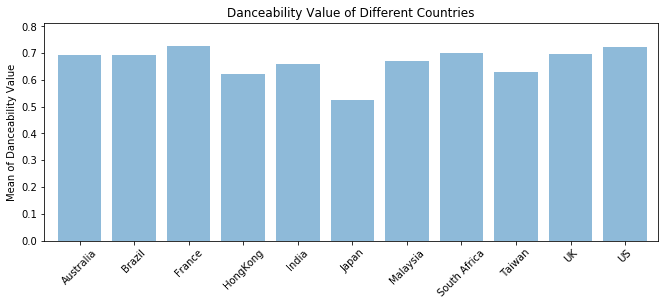

In [211]:
plt.figure(figsize=(len(danceability_df["Country"]),4))
plt.bar(danceability_df["Country"],danceability_df["Mean Value Danceability"],alpha=0.5, align="edge")
plt.xticks(tick_locations,danceability_df["Country"], rotation=45)
plt.xlim(-0.25, len(danceability_df["Country"]))
plt.ylim(0, max(danceability_df["Mean Value Danceability"])+0.085)
plt.title("Danceability Value of Different Countries")
plt.ylabel("Mean of Danceability Value")
plt.savefig("Danceability_stats.png")

In [187]:
#save csv of stats (Danceability)
danceability_df.to_csv("Danceability_Stats.csv",index=False)

In [189]:
#Valence_stats
valence_mean_country = pd.DataFrame(country_data.groupby("Country")['Valence'].mean())
valence_median_country = pd.DataFrame(country_data.groupby("Country")['Valence'].median())
valence_min_country = pd.DataFrame(country_data.groupby("Country")['Valence'].min())
valence_max_country = pd.DataFrame(country_data.groupby("Country")['Valence'].max())

In [190]:
valence_mean_median = pd.merge(valence_mean_country,valence_median_country,on="Country")
valence_max_min = pd.merge(valence_max_country,valence_min_country,on="Country")

In [191]:
valence_stats = pd.merge(valence_mean_median,valence_max_min, on = "Country",how = "outer")
valence_stats

,Valence_x_x,Valence_y_x,Valence_x_y,Valence_y_y
Country,,,,
Australia,0.508396,0.5145,0.925,0.0978
Brazil,0.649620,0.6735,0.964,0.1520
France,0.529280,0.4965,0.933,0.2020
HongKong,0.446896,0.4460,0.925,0.0978
India,0.522576,0.4965,0.925,0.0978
Japan,0.525098,0.5105,0.962,0.0712
Malaysia,0.494236,0.5030,0.925,0.0978
South Africa,0.458146,0.4520,0.925,0.0605
Taiwan,0.401196,0.3725,0.794,0.0978


In [192]:
valence_df = valence_stats.rename(columns={
    "Valence_x_x":"Mean Value Valence",
    "Valence_y_x":"Median Value Valence",
    "Valence_x_y":"Max Value Valence",
    "Valence_y_y":"Min Value Valence"
})
valence_df.reset_index(level=0,inplace=True)

In [193]:
valence_df

,Country,Mean Value Valence,Median Value Valence,Max Value Valence,Min Value Valence
0,Australia,0.508396,0.5145,0.925,0.0978
1,Brazil,0.649620,0.6735,0.964,0.1520
2,France,0.529280,0.4965,0.933,0.2020
3,HongKong,0.446896,0.4460,0.925,0.0978
4,India,0.522576,0.4965,0.925,0.0978
5,Japan,0.525098,0.5105,0.962,0.0712
6,Malaysia,0.494236,0.5030,0.925,0.0978
7,South Africa,0.458146,0.4520,0.925,0.0605
8,Taiwan,0.401196,0.3725,0.794,0.0978
9,UK,0.476066,0.5165,0.884,0.0605


In [194]:
valence_df.to_csv("Valence_stats.csv",index=False)

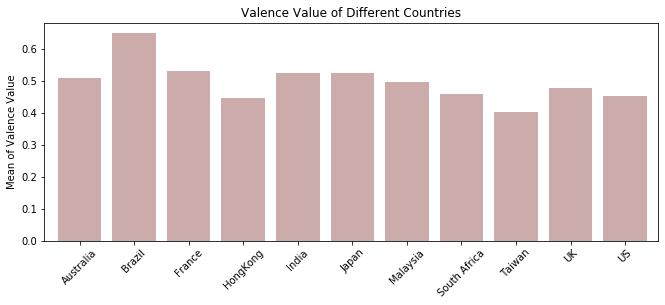

In [210]:
plt.figure(figsize=(len(valence_df["Country"]),4))
plt.bar(valence_df["Country"],valence_df["Mean Value Valence"],alpha=0.75, align="edge",color='rosybrown')
plt.xticks(tick_locations,valence_df["Country"], rotation=45)
plt.xlim(-0.25, len(valence_df["Country"]))
plt.ylim(0, max(valence_df["Mean Value Valence"])+0.03)
plt.ylabel("Mean of Valence Value")
plt.title("Valence Value of Different Countries")
plt.savefig("Valence_stats.png")

<Figure size 432x288 with 0 Axes>

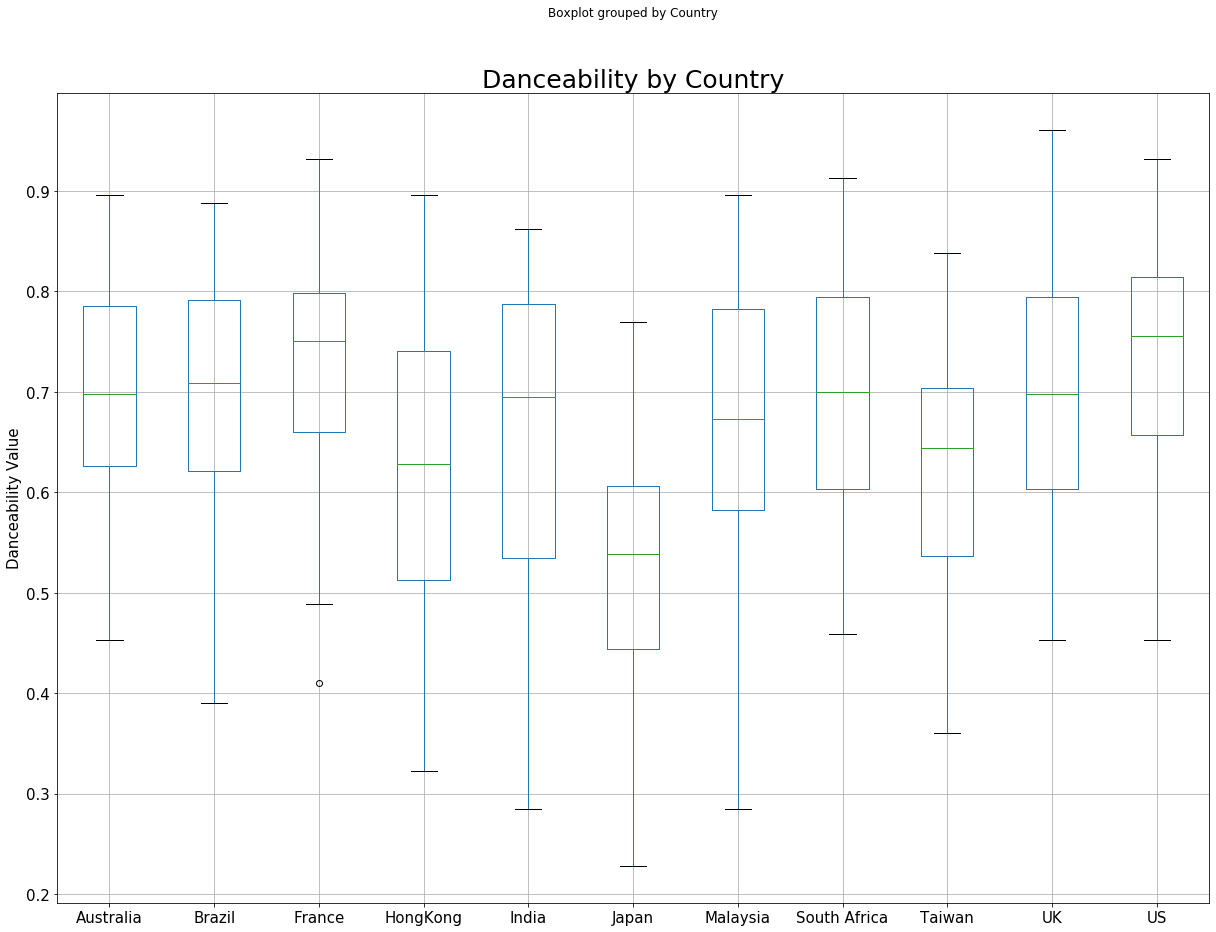

In [264]:
danceability_plot=country_data.boxplot("Danceability", by="Country", figsize=(20, 15),fontsize="15")
danceability_plot.set_title("Danceability by Country",fontsize="25")
plt.ylabel("Danceability Value",fontsize="15")
plt.xlabel("")
plt.savefig("Danceability Boxplot.png")
plt.show()

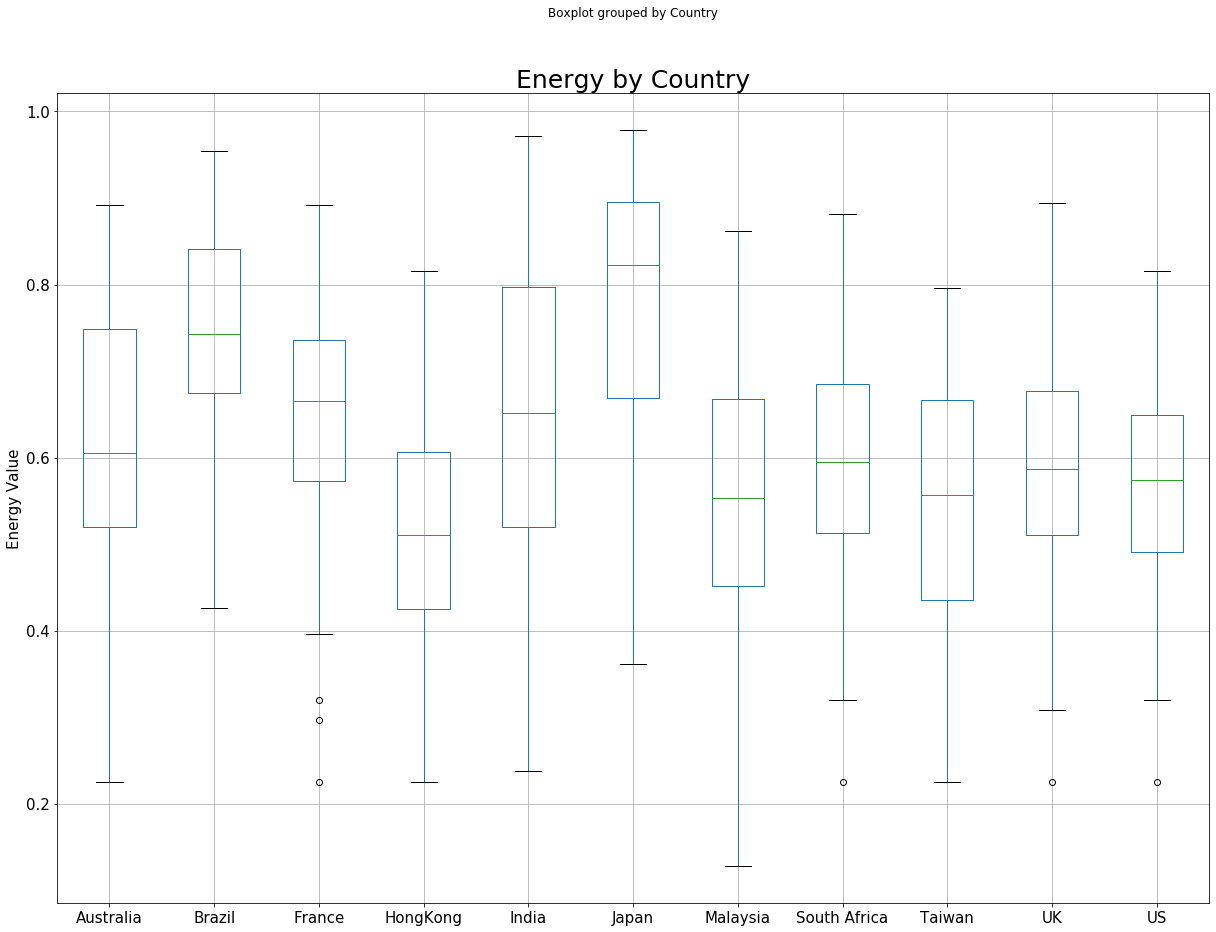

In [263]:
energy_plot=country_data.boxplot("Energy", by="Country", figsize=(20, 15),fontsize="15")
energy_plot.set_title("Energy by Country",fontsize="25")
plt.ylabel("Energy Value",fontsize="15")
plt.xlabel("")
plt.savefig("Energy Boxplot.png")
plt.show()

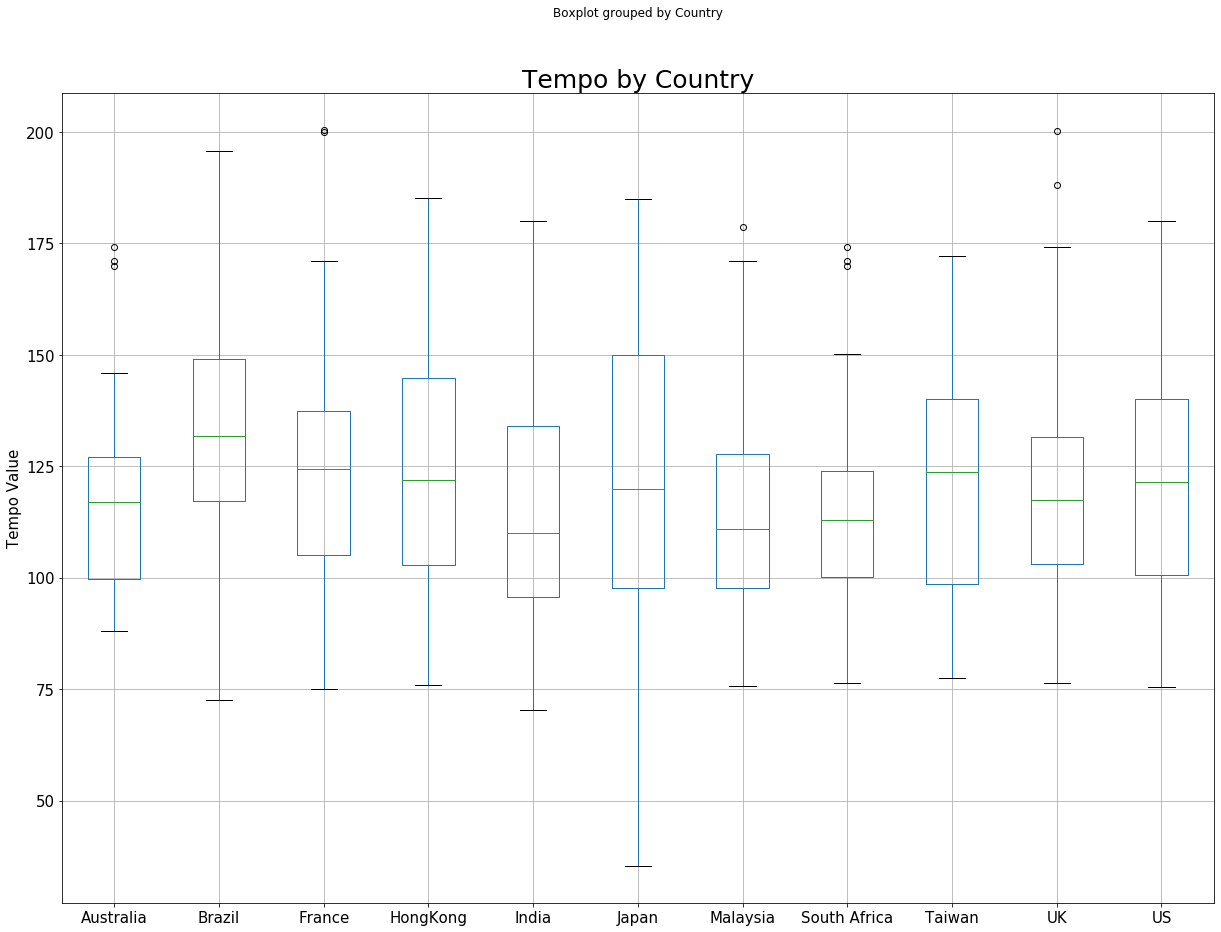

In [262]:
tempo_plot=country_data.boxplot("Tempo", by="Country", figsize=(20, 15),fontsize="15")
tempo_plot.set_title("Tempo by Country",fontsize="25")
plt.ylabel("Tempo Value",fontsize="15")
plt.xlabel("")
plt.savefig("Tempo Boxplot.png")
plt.show()

In [267]:
df_corr = country_data.corr()
df_corr.unstack().sort_values()
df_corr.to_csv("pvalue_audio_features.csv",index=False)

In [256]:
#Grouping countries by Danceability - to see the differences between 2 countries
group1 = country_data[country_data["Country"] == "Taiwan"]["Danceability"]
group2 = country_data[country_data["Country"] == "US"]["Danceability"]
group3 = country_data[country_data["Country"] == "South Africa"]["Danceability"]
group4 = country_data[country_data["Country"] == "Australia"]["Danceability"]
group5 = country_data[country_data["Country"] == "Japan"]["Danceability"]
group6 = country_data[country_data["Country"] == "Brazil"]["Danceability"]
group7 = country_data[country_data["Country"] == "India"]["Danceability"]
group8 = country_data[country_data["Country"] == "UK"]["Danceability"]
group9 = country_data[country_data["Country"] == "Malaysia"]["Danceability"]
group10 = country_data[country_data["Country"] == "HongKong"]["Danceability"]
group11 = country_data[country_data["Country"] == "France "]["Danceability"]
#stats.f_oneway(group1, group2)

In [259]:
#stats.f_oneway(group1, group2, group3, group4, group5, group6)

F_onewayResult(statistic=18.9451231825841, pvalue=2.4899530117809795e-16)